In [1]:
#Importing necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

**Create a straight line dataset using the linear regression formula (weight * X + bias).**

**1. Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.**

**2. Split the data into 80% training, 20% testing.**

**3. Plot the training and testing data so it becomes visual.**

In [2]:
weight = 0.3
bias = 0.9
X = torch.arange(start = 0, end = 1000, step = 1, dtype = torch.float32).unsqueeze(dim = 1)
y = weight * X + bias

In [3]:
train_split = int(0.8 * len(X))
X_train, y_train = X[: train_split], y[: train_split]
X_test, y_test = X[train_split: ], y[train_split: ]

In [4]:
def plot_data(train_data, train_output, test_data, test_output, predictions = None):
    plt.scatter(train_data, train_output, c = 'b', s = 4, label = 'Training Data')
    plt.scatter(test_data, test_output, c = 'g', s = 4, label = 'Test data')
    if predictions is not None:
        plt.scatter(test_data, predictions, c = 'r', s = 4, label = 'Predictions')
    plt.legend()

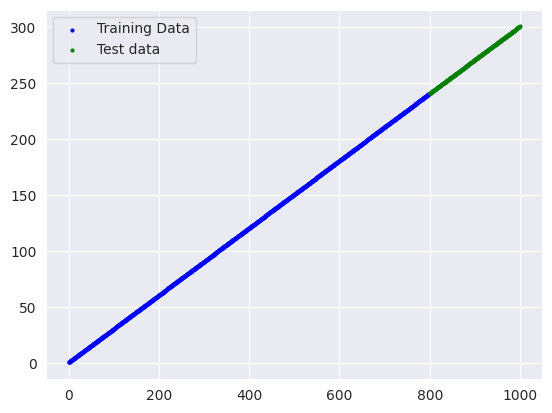

In [5]:
plot_data(X_train, y_train, X_test, y_test)

In [6]:
#Making the data device agnostic
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [7]:
device

'cuda'

In [8]:
torch.cuda.is_available()

True

In [9]:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

**Build a PyTorch model by subclassing nn.Module.**

**1. Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.**

**2. Implement the forward() method to compute the linear regression function you used to create the dataset in 1.**

**3. Once you've constructed the model, make an instance of it and check its state_dict().**

**Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.**

In [10]:
#Model Building
class LinearRegressionEx(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features = 1, out_features = 1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)     

In [11]:
#Creating a model instance
model = LinearRegressionEx()

In [12]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.5826]])),
             ('linear_layer.bias', tensor([0.1231]))])

**Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.**

**1. Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.**

**2. Write a training loop to perform the appropriate training steps for 300 epochs.**

**The training loop should test the model on the test dataset every 20 epochs.**

In [13]:
loss_fn = nn.L1Loss()
opt_fn = torch.optim.Adam(params = model.parameters(), lr = 0.01)

In [14]:
X_train.device, y_train.device, X_test.device, y_test.device

(device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0))

In [15]:
#Moving the model to GPU
model.to(device)

LinearRegressionEx(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [16]:
#Training loop
train_loss_log = []
test_loss_log = []
epoch_count = []
epochs = 300
for i in range(epochs):
    #model set to train mode
    model.train()
    #forward pass
    train_pred = model(X_train)
    #Loss 
    train_loss = loss_fn(train_pred, y_train)
    # Optimizer reset
    opt_fn.zero_grad()
    #backpropagation
    train_loss.backward()
    #Stepping the optimizer
    opt_fn.step()
    print(f'Epoch: {i} | Train Loss: {train_loss} | Model Parameters: {model.state_dict()}')
    epoch_count.append(i + 1)
    train_loss_log.append(train_loss)
    #Setting the model to eval mode
    model.eval()
    with torch.inference_mode():
        #Forward test pass
        test_pred = model(X_test)
        #Test Loss
        test_loss = loss_fn(test_pred, y_test)
        if(i % 20 == 0):
            test_loss_log.append(test_loss)
            print(f'Test Loss: {test_loss}')

Epoch: 0 | Train Loss: 353.36248779296875 | Model Parameters: OrderedDict([('linear_layer.weight', tensor([[-0.5726]], device='cuda:0')), ('linear_layer.bias', tensor([0.1331], device='cuda:0'))])
Test Loss: 785.6412353515625
Epoch: 1 | Train Loss: 349.35748291015625 | Model Parameters: OrderedDict([('linear_layer.weight', tensor([[-0.5626]], device='cuda:0')), ('linear_layer.bias', tensor([0.1431], device='cuda:0'))])
Epoch: 2 | Train Loss: 345.35247802734375 | Model Parameters: OrderedDict([('linear_layer.weight', tensor([[-0.5526]], device='cuda:0')), ('linear_layer.bias', tensor([0.1531], device='cuda:0'))])
Epoch: 3 | Train Loss: 341.3475036621094 | Model Parameters: OrderedDict([('linear_layer.weight', tensor([[-0.5426]], device='cuda:0')), ('linear_layer.bias', tensor([0.1631], device='cuda:0'))])
Epoch: 4 | Train Loss: 337.3424987792969 | Model Parameters: OrderedDict([('linear_layer.weight', tensor([[-0.5326]], device='cuda:0')), ('linear_layer.bias', tensor([0.1731], device='

**Make predictions with the trained model on the test data.
Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).**

In [17]:
#Making predictions
model.eval()
with torch.inference_mode():
    y_pred = model(X_test)
y_pred

tensor([[241.0498],
        [241.3500],
        [241.6502],
        [241.9504],
        [242.2506],
        [242.5508],
        [242.8510],
        [243.1512],
        [243.4513],
        [243.7515],
        [244.0517],
        [244.3519],
        [244.6521],
        [244.9523],
        [245.2525],
        [245.5527],
        [245.8528],
        [246.1530],
        [246.4532],
        [246.7534],
        [247.0536],
        [247.3538],
        [247.6540],
        [247.9542],
        [248.2544],
        [248.5546],
        [248.8547],
        [249.1549],
        [249.4551],
        [249.7553],
        [250.0555],
        [250.3557],
        [250.6559],
        [250.9561],
        [251.2563],
        [251.5564],
        [251.8566],
        [252.1568],
        [252.4570],
        [252.7572],
        [253.0574],
        [253.3576],
        [253.6578],
        [253.9579],
        [254.2581],
        [254.5583],
        [254.8585],
        [255.1587],
        [255.4589],
        [255.7591],


**Make predictions with the trained model on the test data.
Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).**

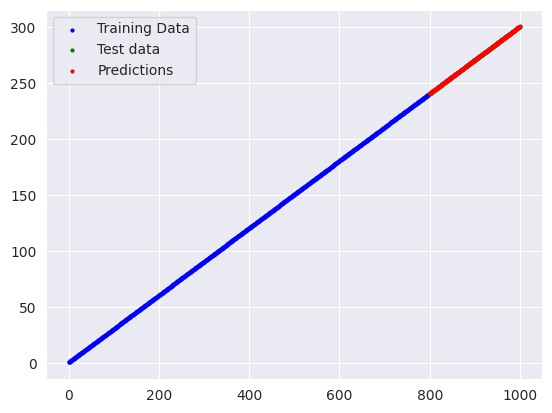

In [18]:
plot_data(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), predictions = y_pred.cpu())

In [19]:
X_train.cpu().device

device(type='cpu')

In [20]:
X_train.device

device(type='cuda', index=0)

**1. Save your trained model's state_dict() to file.**

**2. Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.**

**3. Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.**

In [21]:
from pathlib import Path
Main_Dir = Path('Linear_reg_Ex')
Main_Dir.mkdir(exist_ok = True, parents = True)
Model_Path = 'LinearRegModelEx.pth'
Overall_Path = Main_Dir / Model_Path
torch.save(obj = model.state_dict(), f = Overall_Path)

In [22]:
#Creating an instance
Loaded_LR_Ex = LinearRegressionEx()
Loaded_LR_Ex.load_state_dict(torch.load(Overall_Path))

<All keys matched successfully>

In [23]:
Loaded_LR_Ex

LinearRegressionEx(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [24]:
Loaded_LR_Ex.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3002]])),
             ('linear_layer.bias', tensor([0.8987]))])

In [29]:
Loaded_LR_Ex.eval()
with torch.inference_mode():
    loaded_y_pred = Loaded_LR_Ex(X_test.cpu())

In [38]:
torch.Tensor(loaded_y_pred) == torch.Tensor(y_pred.cpu())

tensor([[ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True